# **TRABAJO 2**

>## Programación para la análitica de datos
>> ## Presentado por: 
>> ## Jaime Chacón
>> ## Andrés Pascagasa
>> ## Julián Parra

## **CONTEXTO**
Los siguientes ejercicios tienen como objetivo prácticar la elaboración de algoritmos para resolver los problemas propuestos por los integrantes del equipo analizando los conjuntos de datos dispuestos en <a href="https://www.kaggle.com/rusiano/madrid-airbnb-data">Madrid-data</a> donde está la información de los alojamientos en la ciudad de **Madrid España** registrados en la plataforma **Airbnb**. 



## 1. ¿Cual es la ocupación mes promedio de los hospedajes agrupado por zona?

### Descripción del proceso 

En este caso se parte de la tabla de listings se selecciona las columnas con la información de interés, la cual contiene datos de los hospedajes, luego se procede a realizar la agrupación de los datos que contiene la tabla calendar, después de tener los datos agrupados y seleccionados se cruzan las dos tablas mediante un merge y por ultimo se grafica la información por zona para analizar su comportamiento.

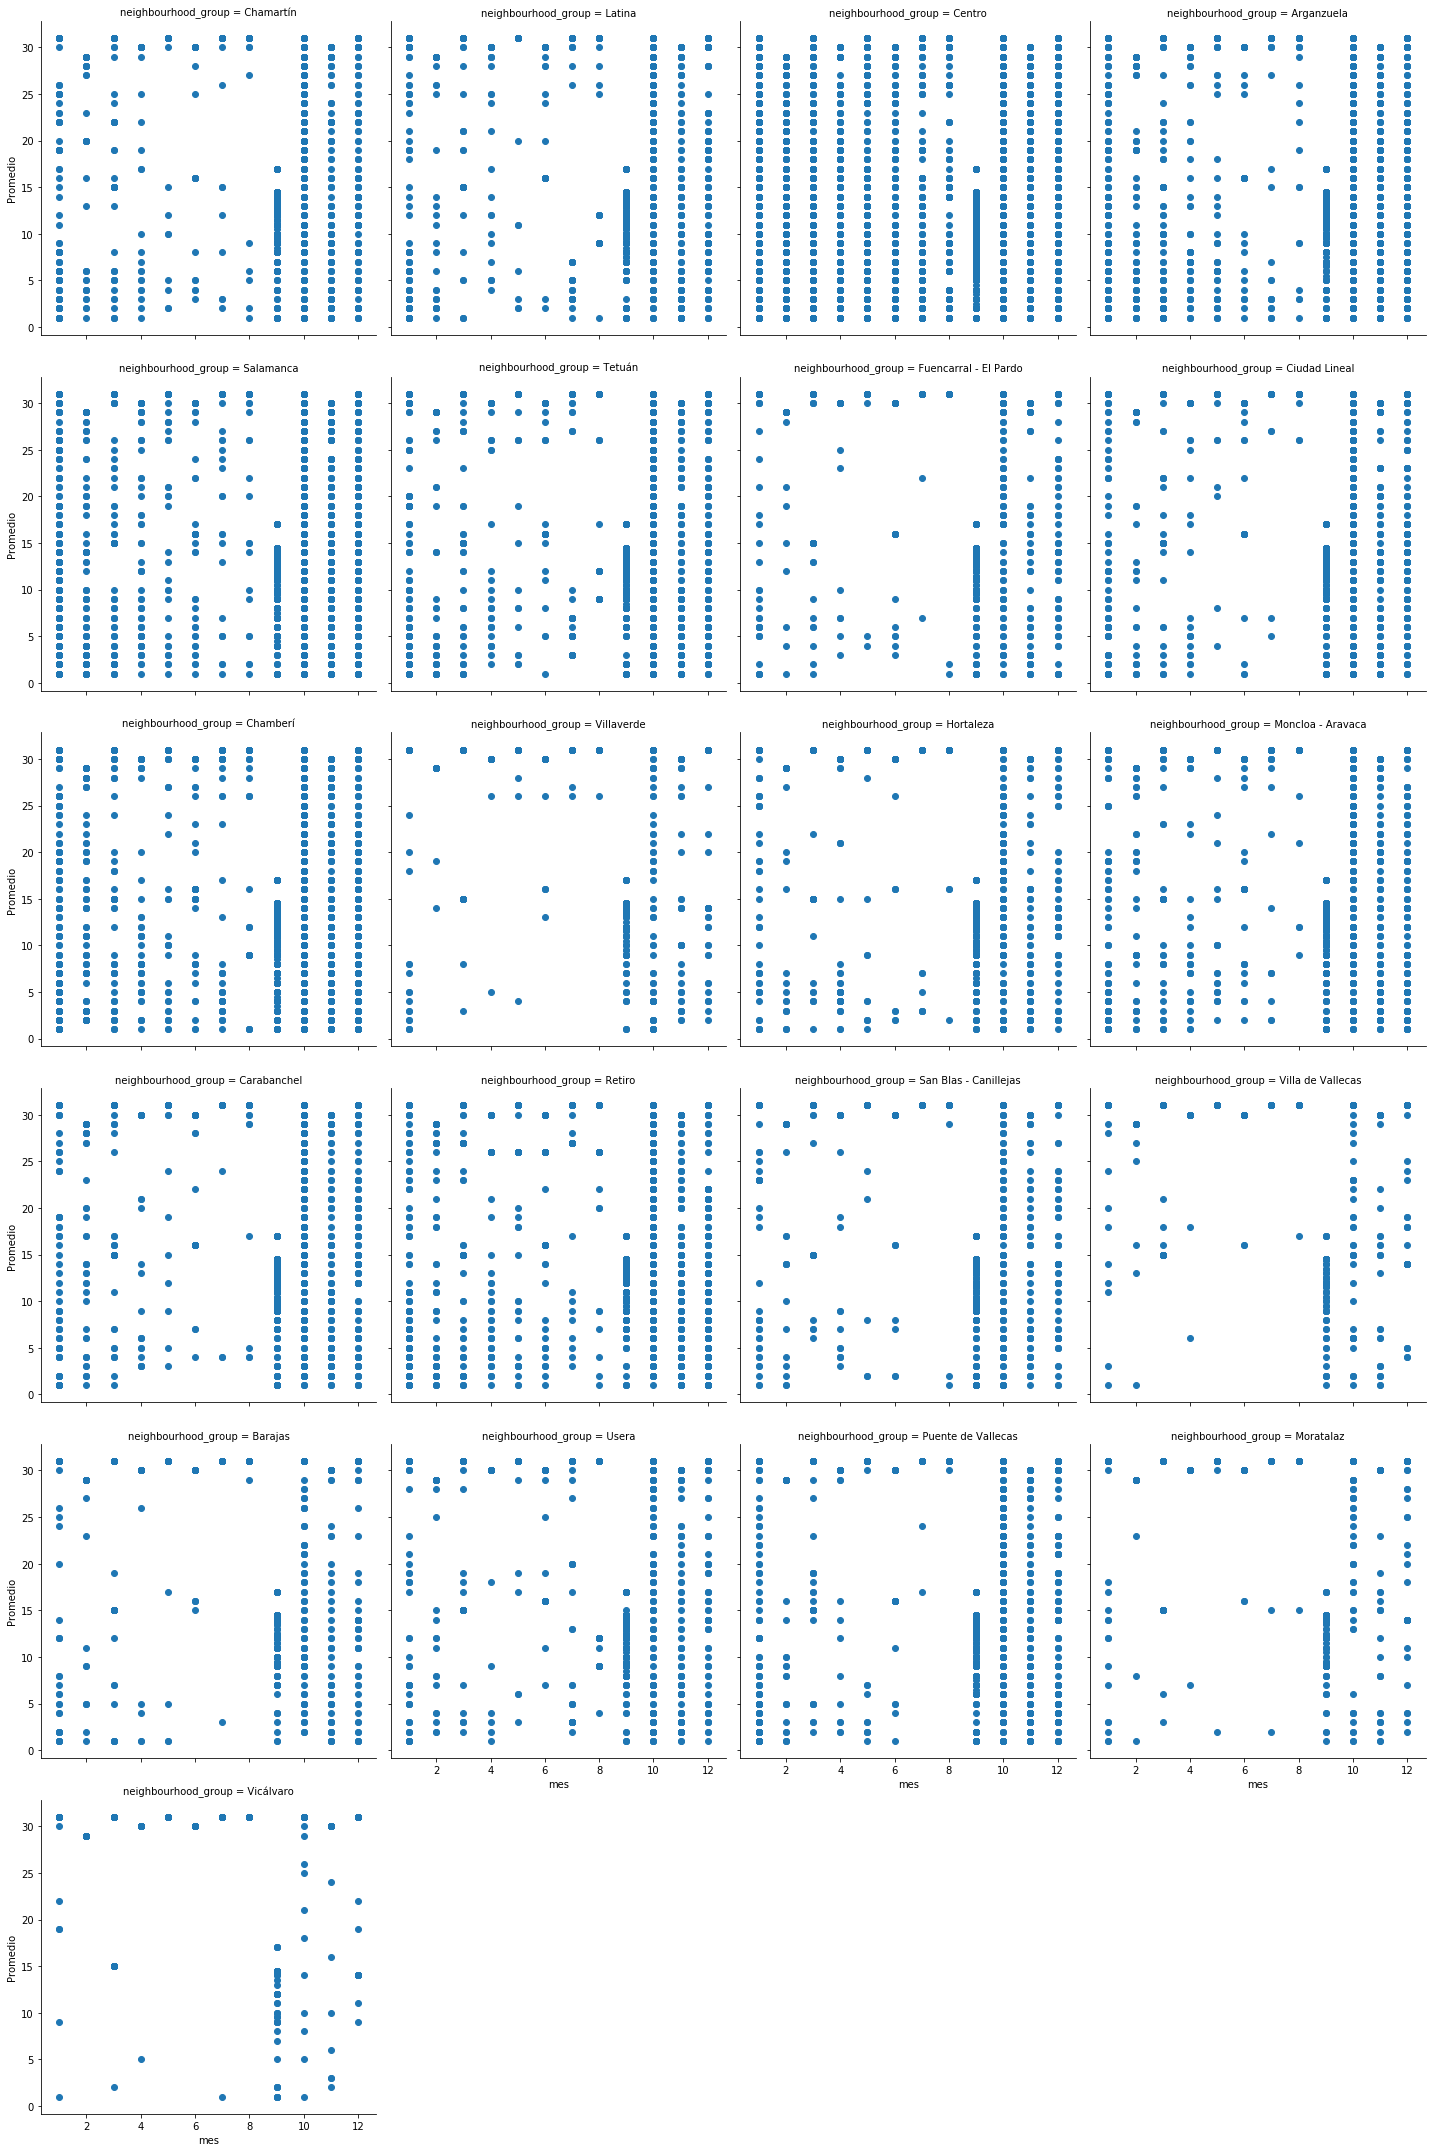

In [316]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import time
from datetime import date
pd.options.mode.chained_assignment = None

#Rutas de los Dataframes -- Variar la ruta para ejecutar código.
ruta_cal = "C:/Users/judlparra/Downloads/madrid-airbnb-data/calendar.csv"
ruta_lis = "C:/Users/judlparra/Downloads/madrid-airbnb-data/listings.csv"
ruta_nei = "C:/Users/judlparra/Downloads/madrid-airbnb-data/neighbourhoods.csv"
ruta_rev = "C:/Users/judlparra/Downloads/madrid-airbnb-data/reviews_detailed.csv"
#Definición de los dataframes
dfcal = pd.read_csv(ruta_cal, sep=',', encoding='utf-8', error_bad_lines=False)
dflis = pd.read_csv(ruta_lis, sep=',', encoding='utf-8', error_bad_lines=False)
dfnei = pd.read_csv(ruta_nei, sep=',', encoding='utf-8', error_bad_lines=False)
dfrev = pd.read_csv(ruta_rev, sep=',', encoding='utf-8', error_bad_lines=False)
#Selección de las columnas dataframe dflis(listings)
dflis2 = dflis[['id','host_name','neighbourhood','neighbourhood_group']]
#Filtro calendar con las ocupaciones
dfcal2 =  dfcal[dfcal.available == "f"]

#Cambio de Tipo de dato para el campo date dataframe dfcal
dfcal2['date'] = pd.to_datetime(dfcal2['date']) 
dfcal2['año'] = dfcal2['date'].dt.year
dfcal2['mes'] = dfcal2['date'].dt.month
#Agrupaciones  
dfcal2 = dfcal2.groupby(['listing_id','año','mes'] , as_index=False )['price'].count() 
dfcal2 = dfcal2.groupby(['listing_id','mes'] , as_index=False )['price'].mean() 
#Cruce de datos
dfmer = dflis2.merge(dfcal2, left_on='id', right_on='listing_id')
dfmer = dfmer.rename(columns={'price':'Promedio'})
dfmer = dfmer.drop(columns ='listing_id')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
grid = sns.FacetGrid(dfmer, col='neighbourhood_group',height=5,aspect=1,col_wrap=4)
grid.map(plt.scatter,'mes','Promedio')
plt.show()

De las anteriores gráficas se puede inferir que las ocupaciones promedio en la mayoría de los casos, excepto en las zonas céntricas donde la oferta es variada, es que en los meses de mitad de año la oferta es baja, dado que los datos mas concentrados se distribuyen hacia la parte superior o ocupaciones promedio 30, mientras que a final y principio de año la dispersión es alta mostrando que son épocas donde hay mayor oferta de hospedajes. La información al ser contrastada con las estaciones climáticas demuestra que la mayor parte de las disponibilidades u ofertas se dan en temporadas frías.

## 2. ¿Cuál es la zona donde el alquiler es más costoso agrupado por tipo de cuarto?

### Descripción del proceso 

En este caso se parte de la tabla de listings donde se genera una tabla pivote que nos muestra precio máximo de alojamiento agrupado por zona y por tipo de alojamiento, después de grafíca la distribución de precios para todas la zona para evidenciar graficamente donde están los puntos más alejados que indican los precios máximos.

In [317]:
#Cruzo las categorías necesarias para obtener los datos y los ordeno de mayor a menor
dflis.pivot_table(index= ['neighbourhood_group','room_type'], values='price',aggfunc=np.max).sort_values("price", ascending=False).head()


price
neighbourhood_group room_type             
Centro              Private room      9999
                    Entire home/apt   9999
Salamanca           Entire home/apt   8930
Tetuán              Entire home/apt   8601
Arganzuela          Entire home/apt   8465

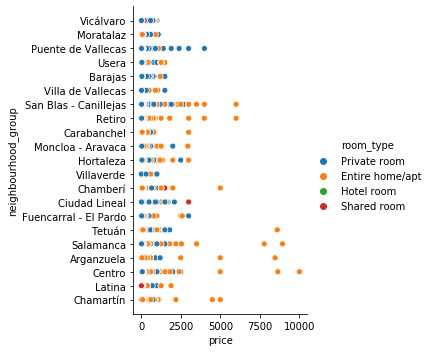

In [318]:
#Genero la gráfica teniendo en cuenta los parámetros que requiere contestar la pregunta
sns.relplot(x="price", y="neighbourhood_group", hue='room_type', data=dflis)

Después de realizar el análisis se evidencia que la zona en la que se encuentran **los hospedajes más costosos con respecto al tipo de habitación es la zona Centro con los hospedajes de hogar/apartamento completo**, seguido por el alojamiento de cuarto privado de la misma zona.

## 3. ¿Cuáles son las zonas donde hay más de 600 alojamientos y cuáles de estas zonas tienen en promedio el menor precio?

### Descripción del proceso

Para resolver este interrogante es necesario crear un tabla que genere el conteo de los alojamientos y el promedio de precios, agrupándolos por ZONA utilizando la función ```groupby```.
Se ordenan las zonas según el promedio de precios.
Se filtra la tabla resultante con las zonas con cantidad de alojamientos mayor o iguales a 600.

In [319]:
 # Calcula el número de alojamientos y el promedio de precios agrupado por zona
zona = dflis.groupby(['neighbourhood_group'])['price'].agg({'Oferta' : np.size, 'Precio_Promedio' : np.mean})

# Ordena de forma descendente segun el precio promedio
zona.sort_values(['Precio_Promedio'], ascending = False, inplace = True) 

# Crea una coumna nueva con los nombres de las zonas
zona['Zona'] = zona.index 
# Filtra la tabla dejando en **zonaf** unicamente las zonas que tienen más de 600 alojamientos
zonaf = zona[zona['Oferta'] >= 600]

C:\Users\judlparra\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


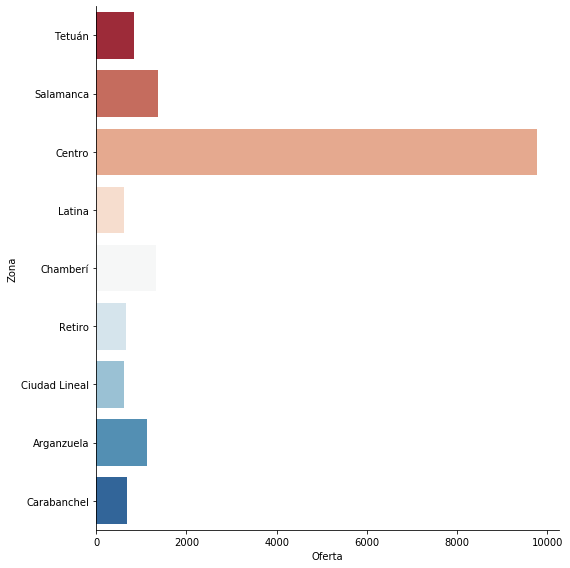

In [320]:
graf = sns.catplot(x="Oferta", y = "Zona", kind='bar', color='red', data=zonaf, height=8, palette="RdBu") # Generación del gráfico de barras

Se puede evidenciar en la gráfica que la zona que cuenta con la mayor oferta de alojamientos con mucha ventaja frente a los demás es **Centro** posicionándose en el tercer lugar en precio promedio; Por otra parte, podemos ver que las zonas: **Carabanchel** y **Arganzuela** tienen en promedio los precios más bajos del mercado teniendo una oferta de alojamientos competitiva.